<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Explorando-os-dados-de-bicicletas-compartilhadas-em-Chicago" data-toc-modified-id="Explorando-os-dados-de-bicicletas-compartilhadas-em-Chicago-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Explorando os dados de bicicletas compartilhadas em Chicago</a></span></li></ul></div>

# Projeto I - Fundamentos de Data Scientist I - Udacity

### Explorando os dados de bicicletas compartilhadas em Chicago

In [ ]:
# Colunas (campos) presentes neste dataset:
    # Start Time
    # End Time
    # Trip Duration
    # Start Station
    # End Station
    # User Type
    # Gender
    # Birth Year

In [1]:
import csv
import matplotlib.pyplot as plt
import statistics

In [2]:
with open('chicago-bikeshare-pt/chicago.csv', 'r') as file_read:
    reader = csv.reader(file_read)
    data_list = list(reader)

In [3]:
print(len(data_list))

1551506


In [4]:
print(data_list[0])

['Start Time', 'End Time', 'Trip Duration', 'Start Station', 'End Station', 'User Type', 'Gender', 'Birth Year']


In [5]:
print(data_list[1])

['2017-01-01 00:00:36', '2017-01-01 00:06:32', '356', 'Canal St & Taylor St', 'Canal St & Monroe St (*)', 'Customer', '', '']


In [6]:
print(data_list[2])

['2017-01-01 00:02:54', '2017-01-01 00:08:21', '327', 'Larrabee St & Menomonee St', 'Sheffield Ave & Kingsbury St', 'Subscriber', 'Male', '1984.0']


In [7]:
print(data_list[3])

['2017-01-01 00:06:06', '2017-01-01 00:18:31', '745', 'Orleans St & Chestnut St (NEXT Apts)', 'Ashland Ave & Blackhawk St', 'Subscriber', 'Male', '1985.0']


In [8]:
# Eliminando cabeçalho
data_list = data_list[1:]
print(data_list[0])

['2017-01-01 00:00:36', '2017-01-01 00:06:32', '356', 'Canal St & Taylor St', 'Canal St & Monroe St (*)', 'Customer', '', '']


In [9]:
print(data_list[0][0])

2017-01-01 00:00:36


In [10]:
# Imprimindo as 20 primeiras amostras
for i in range(20):
    print(data_list[i])

['2017-01-01 00:00:36', '2017-01-01 00:06:32', '356', 'Canal St & Taylor St', 'Canal St & Monroe St (*)', 'Customer', '', '']
['2017-01-01 00:02:54', '2017-01-01 00:08:21', '327', 'Larrabee St & Menomonee St', 'Sheffield Ave & Kingsbury St', 'Subscriber', 'Male', '1984.0']
['2017-01-01 00:06:06', '2017-01-01 00:18:31', '745', 'Orleans St & Chestnut St (NEXT Apts)', 'Ashland Ave & Blackhawk St', 'Subscriber', 'Male', '1985.0']
['2017-01-01 00:07:28', '2017-01-01 00:12:51', '323', 'Franklin St & Monroe St', 'Clinton St & Tilden St', 'Subscriber', 'Male', '1990.0']
['2017-01-01 00:07:57', '2017-01-01 00:20:53', '776', 'Broadway & Barry Ave', 'Sedgwick St & North Ave', 'Subscriber', 'Male', '1990.0']
['2017-01-01 00:10:44', '2017-01-01 00:21:27', '643', 'State St & Kinzie St', 'Wells St & Polk St', 'Subscriber', 'Male', '1970.0']
['2017-01-01 00:11:34', '2017-01-01 00:23:47', '733', 'Wabash Ave & Wacker Pl', 'Clinton St & Tilden St', 'Subscriber', 'Male', '1986.0']
['2017-01-01 00:14:57', 

In [11]:
# Testando Dict_reader
with open('chicago-bikeshare-pt/chicago.csv', 'r') as file_read:
    named_list = [{k: v for k , v in row.items()} for row in csv.DictReader(file_read, skipinitialspace=True)]

In [12]:
print(named_list[2])

{'Start Time': '2017-01-01 00:06:06', 'End Time': '2017-01-01 00:18:31', 'Trip Duration': '745', 'Start Station': 'Orleans St & Chestnut St (NEXT Apts)', 'End Station': 'Ashland Ave & Blackhawk St', 'User Type': 'Subscriber', 'Gender': 'Male', 'Birth Year': '1985.0'}


In [13]:
print(data_list[0])

['2017-01-01 00:00:36', '2017-01-01 00:06:32', '356', 'Canal St & Taylor St', 'Canal St & Monroe St (*)', 'Customer', '', '']


In [14]:
for i in range(1, 21):
    print(data_list[i])

['2017-01-01 00:02:54', '2017-01-01 00:08:21', '327', 'Larrabee St & Menomonee St', 'Sheffield Ave & Kingsbury St', 'Subscriber', 'Male', '1984.0']
['2017-01-01 00:06:06', '2017-01-01 00:18:31', '745', 'Orleans St & Chestnut St (NEXT Apts)', 'Ashland Ave & Blackhawk St', 'Subscriber', 'Male', '1985.0']
['2017-01-01 00:07:28', '2017-01-01 00:12:51', '323', 'Franklin St & Monroe St', 'Clinton St & Tilden St', 'Subscriber', 'Male', '1990.0']
['2017-01-01 00:07:57', '2017-01-01 00:20:53', '776', 'Broadway & Barry Ave', 'Sedgwick St & North Ave', 'Subscriber', 'Male', '1990.0']
['2017-01-01 00:10:44', '2017-01-01 00:21:27', '643', 'State St & Kinzie St', 'Wells St & Polk St', 'Subscriber', 'Male', '1970.0']
['2017-01-01 00:11:34', '2017-01-01 00:23:47', '733', 'Wabash Ave & Wacker Pl', 'Clinton St & Tilden St', 'Subscriber', 'Male', '1986.0']
['2017-01-01 00:14:57', '2017-01-01 00:26:22', '685', 'Daley Center Plaza', 'Canal St & Monroe St (*)', 'Customer', '', '']
['2017-01-01 00:15:03', '2

In [15]:
# Tarefa 2: Imprima o Gênero das 20 primeiras amostras
data_list = data_list[1:]
for i in range(20):
    print("Amostra {:2} - Gênero: {}".format(i+1, data_list[i][6] if data_list[i][6] != '' else 'Não informado'))
    #print(f'Amostra {(i+1):2} - Gênero: {data_list[i][6] if data_list[i][6] != "" else "Não informado"}')

Amostra  1 - Gênero: Male
Amostra  2 - Gênero: Male
Amostra  3 - Gênero: Male
Amostra  4 - Gênero: Male
Amostra  5 - Gênero: Male
Amostra  6 - Gênero: Male
Amostra  7 - Gênero: Não informado
Amostra  8 - Gênero: Não informado
Amostra  9 - Gênero: Não informado
Amostra 10 - Gênero: Female
Amostra 11 - Gênero: Não informado
Amostra 12 - Gênero: Male
Amostra 13 - Gênero: Male
Amostra 14 - Gênero: Female
Amostra 15 - Gênero: Male
Amostra 16 - Gênero: Male
Amostra 17 - Gênero: Male
Amostra 18 - Gênero: Female
Amostra 19 - Gênero: Male
Amostra 20 - Gênero: Female


In [16]:
# Tarefa 3: Crie uma função para adicionar as colunas(features) de uma lista em outra lista, na mesma ordem

def column_to_list(data, index):
    """
    Cria uma lista com todos os dados referentes a uma determinada coluna
    
    Argumentos:
    data -- Dataset no qual deseja-se extrair os campos (list)
    index -- Referência numérica do índice da coluna dentro do referido Dataset (int)
    
    Retorno:
    column_list -- Lista com todos os dados referentes ao campo em questão (list)
    """
    column_list = []
    for registro in data:
        try:
            column_list.append(registro[index]) 
        except IndexError:
            message = 'Para o data_set "data", selecione um "index" < {}.'.format(len(data[0]))
            return message
            
    return column_list

In [17]:
gender_column_data = column_to_list(data_list, 6)
print(gender_column_data[:50])

['Male', 'Male', 'Male', 'Male', 'Male', 'Male', '', '', '', 'Female', '', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', '', 'Female', '', 'Female', 'Male', '', 'Male', 'Female', '', 'Male', '', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', '', '', 'Male', 'Male', '', 'Male', 'Male', 'Female', 'Male', 'Female']


In [18]:
# Tarefa 3: Crie uma função para adicionar as colunas(features) de uma lista em outra lista, na mesma ordem

# Tentantdo via named_list (dict)

def column_to_list(data, index):
    """
    Cria uma lista com todos os dados referentes a uma determinada coluna
    
    Argumentos:
    data -- Dataset no qual deseja-se extrair os campos (lista de dicionários)
    index -- Nome da coluna [chave] dentro do referido Dataset (string)
    
    Retorno:
    column_list -- Lista com todos os dados referentes ao campo em questão (list)
    """
    column_list = []
    #index = index.title() # Evita erros do tipo "birth year" != "Birth Year"
    for registro in data:
        try:
            column_list.append(registro[index])
        except KeyError:
            print('Coluna inexistente no Dataset "data". Veja as entradas possíveis: ')
            chaves = list(registro.keys())
            return chaves
    
    return column_list

In [19]:
result = column_to_list(named_list, 'Gender')
print(result[:50])

['', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', '', '', '', 'Female', '', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', '', 'Female', '', 'Female', 'Male', '', 'Male', 'Female', '', 'Male', '', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', '', '', 'Male', 'Male', '', 'Male', 'Male', 'Female', 'Male']


In [20]:
# TAREFA 4
# Agora sabemos como acessar as features, vamos contar quantos Male (Masculinos) e Female (Femininos) o dataset tem
# TODO: Conte cada gênero. Você não deveria usar uma função parTODO isso.
masculino = feminino = 0

for gender in gender_column_data:
    if gender == 'Male':
        masculino += 1
    elif gender == 'Female':
        feminino += 1

print(f'Masculinos: {masculino}\nFeminino: {feminino}')

Masculinos: 935854
Feminino: 298784


In [21]:
# TAREFA 5
# TODO: Crie uma função para contar os gêneros. Retorne uma lista.
# Isso deveria retornar uma lista com [count_male, count_female] (exemplo: [10, 15] significa 10 Masculinos, 15 Femininos)
def count_gender(data_list):
    male = 0
    female = 0
    
    gender_column_data = column_to_list(data_list, 6)
    
    for gender in gender_column_data:
        if gender == 'Male':
            male += 1
        elif gender == 'Female':
            female += 1
    return [male, female]

gender_list = count_gender(data_list)
print(type(gender_list))
print(f'Tamanho da lista retornada: {len(gender_list)}')
print(f'Masculinos: {gender_list[0]}')
print(f'Femininos: {gender_list[1]}')

<class 'list'>
Tamanho da lista retornada: 2
Masculinos: 935854
Femininos: 298784


In [22]:
# Agora que nós podemos contar os usuários, qual gênero é mais prevalente?
# TAREFA 6
# TODO: Crie uma função que pegue o gênero mais popular, e retorne este gênero como uma string.
# Esperamos ver "Masculino", "Feminino", ou "Igual" como resposta.
def most_popular_gender(data_list):
    male = 0
    female = 0   
    gender_column_data = column_to_list(data_list, 6)    
    
    for gender in gender_column_data:
        if gender == 'Male':
            male += 1
        elif gender == 'Female':
            female += 1
    
    if male > female:
        answer = 'Male'
    elif female > male:
        answer = 'Female'
    else:
        answer = 'Igual'
    
    return answer

In [23]:
print(most_popular_gender(data_list))

Male


In [ ]:
"""
# Se tudo está rodando como esperado, verifique este gráfico!
gender_list = column_to_list(data_list, -2)
types = ["Male", "Female"]
quantity = count_gender(data_list)
y_pos = list(range(len(types)))
plt.bar(y_pos, quantity)
plt.ylabel('Quantidade')
plt.xlabel('Gênero')
plt.xticks(y_pos, types)
plt.title('Quantidade por Gênero')
plt.show(block=True)

input("Aperte Enter para continuar...")
"""

In [ ]:
# TAREFA 7
# TODO: Crie um gráfico similar para user_types. Tenha certeza que a legenda está correta.

def count_user_types(data_list):
    costumer = subscriber = 0
    
    user_types_data = column_to_list(data_list, 5)
    
    for user_type in user_types_data:
        if user_type == 'Customer':
            costumer += 1
        elif user_type == 'Subscriber':
            subscriber += 1
    return [costumer, subscriber]

user_types_list = column_to_list(data_list, 5)
#print(user_types_list[:40])
types = ['Customer', 'Subscriber']
quantity = count_user_types(data_list)
#print(f'Customers: {quantity[0]} \nSubscribers: {quantity[1]}')
y_pos = list(range(len(types)))
plt.bar(y_pos, quantity)
plt.ylabel('Quantidade')
plt.xlabel('Categorias de Usuário')
plt.xticks(y_pos, types)
plt.title('Quantidade por Categoria')
plt.show(block=True)

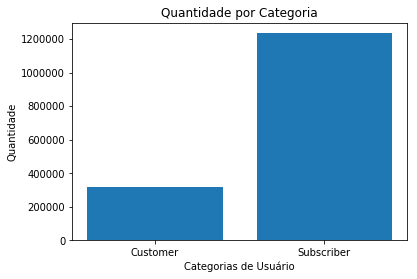

In [26]:
# TAREFA 8
# TODO: Responda a seguinte questão
male, female = count_gender(data_list)
print("\nTAREFA 8: Por que a condição a seguir é Falsa?")
print("male + female == len(data_list):", male + female == len(data_list))
answer = "A condição acima é falsa pois, na base de dados fornecida, há também entradas cujo gênero não foi especificado, ou seja, além de gêneros masculinos\
 e femininos, há valores vazios que devem ser contabilizados, dentro da lista de gêneros, por 'lista_generos.count('')'"
print("resposta:", answer)


TAREFA 8: Por que a condição a seguir é Falsa?
male + female == len(data_list): False
resposta: A condição acima é falsa pois, na base de dados fornecida, há também entradas cujo gênero não foi especificado, ou seja, além de gêneros masculinos e femininos, há valores vazios que devem ser contabilizados, dentro da lista de gêneros, por 'lista_generos.count('')'


In [29]:
# Vamos trabalhar com trip_duration (duração da viagem) agora. Não conseguimos tirar alguns valores dele.
# TAREFA 9
# TODO: Ache a duração de viagem Mínima, Máxima, Média, e Mediana.
# Você não deve usar funções prontas parTODO isso, como max() e min().
trip_duration_list = column_to_list(data_list, 2)
min_trip = 0.
max_trip = 0.
mean_trip = 0.
median_trip = 0.

print(trip_duration_list[:50])
print()
min_trip = min(int(i) for i in trip_duration_list)
max_trip = max(int(i) for i in trip_duration_list)
mean_trip = (sum(int(i) for i in trip_duration_list)) / len(trip_duration_list)
median_trip = statistics.median(int(i) for i in trip_duration_list)

"""mediana = trip_duration_list[int((len(trip_duration_list)/2))+1]
print(len(trip_duration_list))
print(trip_duration_list.index('670'))"""


print(f'Duração mínima de viagem: {min_trip}s')
print(f'Duração máxima de viagem: {max_trip}s')
print(f'Duração média de viagem: {mean_trip}s')
print(f'Mediana: {median_trip}s')
#print(f'Mediana na raça: {mediana}s')

['327', '745', '323', '776', '643', '733', '685', '685', '768', '38781', '757', '177', '332', '846', '1056', '799', '938', '916', '208', '354', '265', '2424', '541', '450', '393', '1799', '748', '755', '1792', '701', '1683', '782', '657', '539', '386', '378', '663', '896', '1246', '88', '552', '1396', '619', '370', '882', '725', '404', '333', '288', '1447']

Duração mínima de viagem: 60s
Duração máxima de viagem: 86338s
Duração média de viagem: 939.7781352803473s
Mediana: 670.0s


In [42]:
# TAREFA 10
# Gênero é fácil porque nós temos apenas algumas opções. E quanto a start_stations? Quantas opções ele tem?
# TODO: Verifique quantos tipos de start_stations nós temos, usando set()

print(user_types_list[:20])
user_types = set(user_types_list)
print(user_types)
print(len(user_types))
print()

start_station_list = column_to_list(data_list, 3) # Cria lista com todas as Start Station
print(f'Há {len(start_station_list)} entradas estações iniciais (Start Station).')
start_station = set(start_station_list)
print(f'Há {len(start_station)} estações iniciais que não se repetem.')




['Subscriber', 'Subscriber', 'Subscriber', 'Subscriber', 'Subscriber', 'Subscriber', 'Customer', 'Customer', 'Customer', 'Subscriber', 'Customer', 'Subscriber', 'Subscriber', 'Subscriber', 'Subscriber', 'Subscriber', 'Subscriber', 'Subscriber', 'Subscriber', 'Subscriber']
{'Customer', 'Subscriber', 'Dependent'}
3

Há 1551504 entradas estações iniciais (Start Station).
Há 582 estações iniciais que não se repetem.


In [43]:
user_types = set(column_to_list(data_list, 3))

print("\nTAREFA 10: Imprimindo as start stations:")
print(len(user_types))
print(user_types)


TAREFA 10: Imprimindo as start stations:
582
{'Wentworth Ave & Archer Ave', 'Theater on the Lake', 'East Ave & Garfield St', 'Halsted St & Roscoe St', 'Ashland Ave & McDowell Ave', 'Ogden Ave & Congress Pkwy', 'California Ave & Division St', 'Calumet Ave & 51st St', 'Kimbark Ave & 53rd St', 'Bennett Ave & 79th St', 'Racine Ave & 18th St', 'California Ave & Fletcher St', 'University Ave & 57th St', 'Halsted St & 59th St', 'Racine Ave & Randolph St', 'Western Ave & Monroe St', 'Sacramento Blvd & Franklin Blvd', 'Kedzie Ave & Leland Ave', 'Jeffery Blvd & 76th St', 'Southport Ave & Clybourn Ave', 'Ashland Ave & Division St', 'Spaulding Ave & Division St', 'Rush St & Hubbard St', 'Clark St & Touhy Ave', 'Marine Dr & Ainslie St', 'Wells St & 19th St', 'Exchange Ave & 79th St', 'Halsted St & 35th St (*)', 'Campbell Ave & Montrose Ave', 'MLK Jr Dr & 47th St', 'Milwaukee Ave & Cuyler Ave', 'Damen Ave & Grand Ave', 'Pine Grove Ave & Irving Park Rd', 'State St & Harrison St', 'Central Park Ave &